In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', 'f4a17ac8cc90454982336a2493d91f8e')

In [ ]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [ ]:
bird_types = 'bem-te-vi','rolinha-cinzenta','trinca-ferro-da-amazonia','Coruja-das-torres','Sanhaçu-da-amazônia'
path = Path('passaros')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in bird_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} passaros')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:
fns = get_image_files(path)
fns

(#736) [Path('passaros/Sanhaçu-da-amazônia/00000047.jpg'),Path('passaros/Sanhaçu-da-amazônia/00000055.jpg'),Path('passaros/Sanhaçu-da-amazônia/00000107.jpg'),Path('passaros/Sanhaçu-da-amazônia/00000036.jpg'),Path('passaros/Sanhaçu-da-amazônia/00000030.jpg'),Path('passaros/Sanhaçu-da-amazônia/00000097.jpg'),Path('passaros/Sanhaçu-da-amazônia/00000148.jpg'),Path('passaros/Sanhaçu-da-amazônia/00000110.jpg'),Path('passaros/Sanhaçu-da-amazônia/00000029.jpg'),Path('passaros/Sanhaçu-da-amazônia/00000112.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#1) [Path('passaros/Coruja-das-torres/00000144.png')]

In [ ]:
failed.map(Path.unlink);

In [ ]:
birds = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = birds.dataloaders(path)

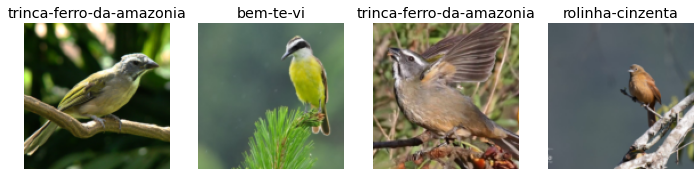

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

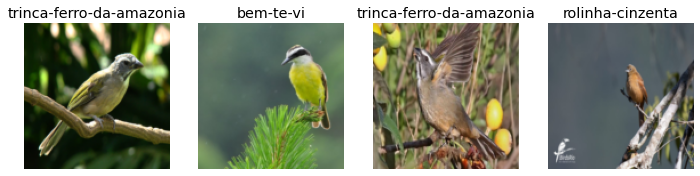

In [ ]:
birds = birds.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = birds.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

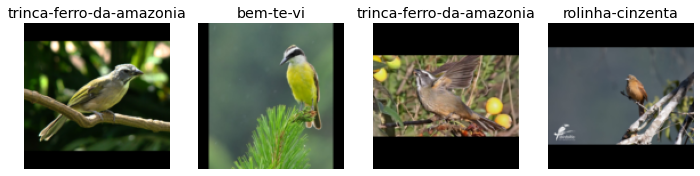

In [ ]:
birds = birds.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = birds.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

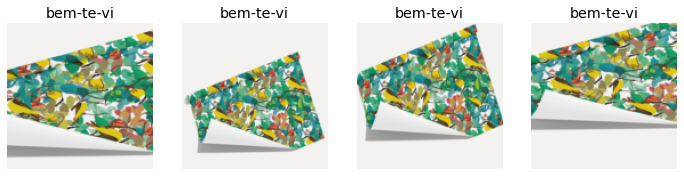

In [ ]:
birds = birds.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = birds.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

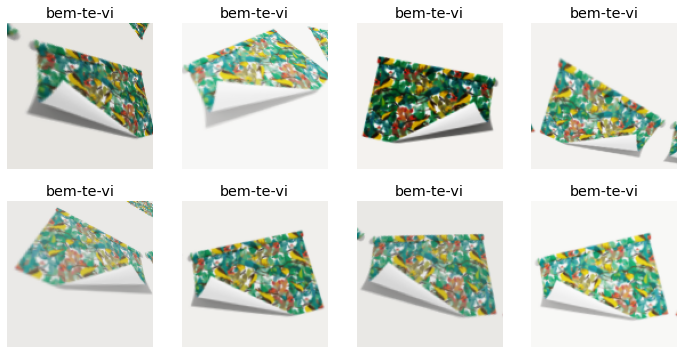

In [ ]:
birds = birds.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = birds.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
birds = birds.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = birds.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.084853,0.507922,0.176871,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.796448,0.378283,0.142857,00:13
1,0.642340,0.287839,0.095238,00:12
2,0.519979,0.257485,0.088435,00:12
3,0.439059,0.243768,0.088435,00:12


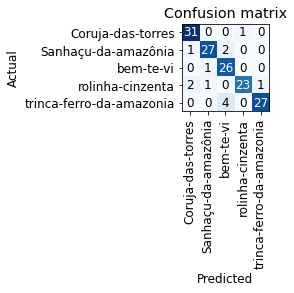

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

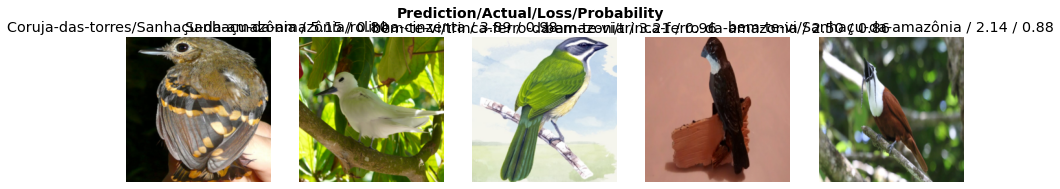

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 1.
Original Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 287, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 39, in fetch
    data = next(self.dataset_iter)
  File "/opt/conda/lib/python3.7/site-packages/fastai/data/load.py", line 118, in create_batches
    yield from map(self.do_batch, self.chunkify(res))
  File "/opt/conda/lib/python3.7/site-packages/fastcore/basics.py", line 217, in chunked
    res = list(itertools.islice(it, chunk_sz))
  File "/opt/conda/lib/python3.7/site-packages/fastai/data/load.py", line 133, in do_item
    try: return self.after_item(self.create_item(s))
  File "/opt/conda/lib/python3.7/site-packages/fastai/data/load.py", line 140, in create_item
    if self.indexed: return self.dataset[s or 0]
  File "/opt/conda/lib/python3.7/site-packages/fastai/data/core.py", line 332, in __getitem__
    res = tuple([tl[it] for tl in self.tls])
  File "/opt/conda/lib/python3.7/site-packages/fastai/data/core.py", line 332, in <listcomp>
    res = tuple([tl[it] for tl in self.tls])
  File "/opt/conda/lib/python3.7/site-packages/fastai/data/core.py", line 298, in __getitem__
    return self._after_item(res) if is_indexer(idx) else res.map(self._after_item)
  File "/opt/conda/lib/python3.7/site-packages/fastai/data/core.py", line 260, in _after_item
    def _after_item(self, o): return self.tfms(o)
  File "/opt/conda/lib/python3.7/site-packages/fastcore/transform.py", line 200, in __call__
    def __call__(self, o): return compose_tfms(o, tfms=self.fs, split_idx=self.split_idx)
  File "/opt/conda/lib/python3.7/site-packages/fastcore/transform.py", line 150, in compose_tfms
    x = f(x, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/fastcore/transform.py", line 73, in __call__
    def __call__(self, x, **kwargs): return self._call('encodes', x, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/fastcore/transform.py", line 83, in _call
    return self._do_call(getattr(self, fn), x, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/fastcore/transform.py", line 89, in _do_call
    return retain_type(f(x, **kwargs), x, ret)
  File "/opt/conda/lib/python3.7/site-packages/fastcore/dispatch.py", line 118, in __call__
    return f(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/fastai/vision/core.py", line 110, in create
    return cls(load_image(fn, **merge(cls._open_args, kwargs)))
  File "/opt/conda/lib/python3.7/site-packages/fastai/vision/core.py", line 85, in load_image
    im = Image.open(fn)
  File "/opt/conda/lib/python3.7/site-packages/PIL/Image.py", line 2975, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: '/notebooks/passaros/trinca-ferro-da-amazonia/00000137.jpg'


In [ ]:
#hide
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()
#for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.dls.vocab

['Coruja-das-torres', 'Sanhaçu-da-amazônia', 'bem-te-vi', 'rolinha-cinzenta', 'trinca-ferro-da-amazonia']

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Sanhaçu-da-amazônia; Probability: 0.9877')

In [ ]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
#hide
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila 